In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import layers
import keras
 
%matplotlib inline
tf.random.set_seed(42)

2024-01-01 16:11:24.829824: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-01 16:11:24.860637: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-01 16:11:25.026049: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-01 16:11:25.027217: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-01 16:11:26.034055: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [3]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import xgboost as xgb
import matplotlib.pyplot as plt
#import plotly.graph_objects as go
import tensorflow as tf
#import tensorflow_addons as tfa

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVR
#from plotly.subplots import make_subplots
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from keras import Sequential
from keras import layers
from keras.models import Model
from keras.layers import LSTM, BatchNormalization, Dropout, Dense, Flatten, Conv1D
from keras.layers import MaxPooling1D, GRU, Input,Masking, Concatenate, dot
from keras.optimizers import Adam, SGD
from keras.losses import MeanAbsoluteError
from keras.metrics import RootMeanSquaredError
from keras.callbacks import EarlyStopping
from keras.callbacks import LearningRateScheduler
from sklearn.metrics import mean_squared_error

In [4]:
df = pd.read_excel(r"~/Downloads/BID_RA_data/BID_RA_20_21.xlsx")

In [5]:
df.head()

,Order ID,Order Date,FY_OrderDate,Month_Name_OrderDate,Purchase Mode,Bid start date,Bid end date,HOD ID,Seller ID,Order_Quarter,...,Shipment Quantity Received,Shipment Quantity Rejected,Shipment Quantity Accepted,CRAC amount,Total payments,Invoice Date,CRAC date,Payment Date,Payment Type,Consignee ID
0,511687744646316,2020-08-28,FY-20-21,Aug 2020,BID,2019-03-26,2019-04-15,SANJEEVVOHRA.664N@NIC.IN,COMP8984,Jul-Sep 2020,...,505.0,0.0,505.0,286335.0,1995840,2020-11-23 00:00:00,2020-12-04 00:00:00,2020-12-08 19:08:17,Online,IC66224A
1,511687744646316,2020-08-28,FY-20-21,Aug 2020,BID,2019-03-26,2019-04-15,SANJEEVVOHRA.664N@NIC.IN,COMP8984,Jul-Sep 2020,...,505.0,0.0,505.0,286335.0,1588734,2020-11-23 00:00:00,2020-12-04 00:00:00,2020-12-17 20:08:17,Online,IC66224A
2,511687744646316,2020-08-28,FY-20-21,Aug 2020,BID,2019-03-26,2019-04-15,SANJEEVVOHRA.664N@NIC.IN,COMP8984,Jul-Sep 2020,...,505.0,0.0,505.0,286335.0,1543941,2020-11-23 00:00:00,2020-12-04 00:00:00,2020-12-17 10:22:45,Online,IC66224A
3,511687744646316,2020-08-28,FY-20-21,Aug 2020,BID,2019-03-26,2019-04-15,SANJEEVVOHRA.664N@NIC.IN,COMP8984,Jul-Sep 2020,...,505.0,0.0,505.0,286335.0,1496880,2020-11-23 00:00:00,2020-12-04 00:00:00,2020-12-08 09:55:55,Online,IC66224A
4,511687744646316,2020-08-28,FY-20-21,Aug 2020,BID,2019-03-26,2019-04-15,SANJEEVVOHRA.664N@NIC.IN,COMP8984,Jul-Sep 2020,...,505.0,0.0,505.0,286335.0,1394820,2020-11-23 00:00:00,2020-12-04 00:00:00,2020-12-17 10:21:22,Online,IC66224A


In [6]:
df.dtypes

Order ID                                  int64
Order Date                       datetime64[ns]
FY_OrderDate                             object
Month_Name_OrderDate                     object
Purchase Mode                            object
Bid start date                   datetime64[ns]
Bid end date                     datetime64[ns]
HOD ID                                   object
Seller ID                                object
Order_Quarter                            object
Order MSME Verified                      object
MSME verfied gender wise                 object
MSME verified social category            object
Startup verfied                          object
Sub Category ID                          object
Expected delivery date           datetime64[ns]
Shipment received date                   object
Order Qty                                 int64
Order value                             float64
Consignment ID                            int64
GeM Invoice Number                      

In [7]:
df.head()

,Order ID,Order Date,FY_OrderDate,Month_Name_OrderDate,Purchase Mode,Bid start date,Bid end date,HOD ID,Seller ID,Order_Quarter,...,Shipment Quantity Received,Shipment Quantity Rejected,Shipment Quantity Accepted,CRAC amount,Total payments,Invoice Date,CRAC date,Payment Date,Payment Type,Consignee ID
0,511687744646316,2020-08-28,FY-20-21,Aug 2020,BID,2019-03-26,2019-04-15,SANJEEVVOHRA.664N@NIC.IN,COMP8984,Jul-Sep 2020,...,505.0,0.0,505.0,286335.0,1995840,2020-11-23 00:00:00,2020-12-04 00:00:00,2020-12-08 19:08:17,Online,IC66224A
1,511687744646316,2020-08-28,FY-20-21,Aug 2020,BID,2019-03-26,2019-04-15,SANJEEVVOHRA.664N@NIC.IN,COMP8984,Jul-Sep 2020,...,505.0,0.0,505.0,286335.0,1588734,2020-11-23 00:00:00,2020-12-04 00:00:00,2020-12-17 20:08:17,Online,IC66224A
2,511687744646316,2020-08-28,FY-20-21,Aug 2020,BID,2019-03-26,2019-04-15,SANJEEVVOHRA.664N@NIC.IN,COMP8984,Jul-Sep 2020,...,505.0,0.0,505.0,286335.0,1543941,2020-11-23 00:00:00,2020-12-04 00:00:00,2020-12-17 10:22:45,Online,IC66224A
3,511687744646316,2020-08-28,FY-20-21,Aug 2020,BID,2019-03-26,2019-04-15,SANJEEVVOHRA.664N@NIC.IN,COMP8984,Jul-Sep 2020,...,505.0,0.0,505.0,286335.0,1496880,2020-11-23 00:00:00,2020-12-04 00:00:00,2020-12-08 09:55:55,Online,IC66224A
4,511687744646316,2020-08-28,FY-20-21,Aug 2020,BID,2019-03-26,2019-04-15,SANJEEVVOHRA.664N@NIC.IN,COMP8984,Jul-Sep 2020,...,505.0,0.0,505.0,286335.0,1394820,2020-11-23 00:00:00,2020-12-04 00:00:00,2020-12-17 10:21:22,Online,IC66224A


In [ ]:
df

In [8]:
df["Sub Category ID"].value_counts()

Sub Category ID
home_clea_clea_rest_sa22374311          339464
home_comm_vehi_2518_au07318205           64297
home_info_comp_comp_0806                 42551
home_mate_cont_bags_bags                 41438
home_info_data_data_spli                 29428
                                         ...  
home_fa68031381_agri_agri_po54470100         1
home_medi_woun_band_st00338710               1
home_dist_in40220274_pump_spec               1
home_chem_comp_orga_meth                     1
home_info_so18353664_engi_inje               1
Name: count, Length: 3166, dtype: int64

In [32]:
df1 = df.drop(df.columns[[0, 7, 8, 14, 19, 20, 21, 31 ]], axis=1)

In [33]:
df1.columns

Index(['Order Date', 'FY_OrderDate', 'Month_Name_OrderDate', 'Purchase Mode',
       'Bid start date', 'Bid end date', 'Order_Quarter',
       'Order MSME Verified', 'MSME verfied gender wise',
       'MSME verified social category', 'Startup verfied',
       'Expected delivery date', 'Shipment received date', 'Order Qty',
       'Order value', 'Shipment Quantity Received',
       'Shipment Quantity Rejected', 'Shipment Quantity Accepted',
       'CRAC amount', 'Total payments', 'Invoice Date', 'CRAC date',
       'Payment Date', 'Payment Type'],
      dtype='object')

In [34]:
df1.isnull().sum()

Order Date                       0
FY_OrderDate                     0
Month_Name_OrderDate             0
Purchase Mode                    0
Bid start date                   0
Bid end date                     0
Order_Quarter                    0
Order MSME Verified              0
MSME verfied gender wise         0
MSME verified social category    0
Startup verfied                  0
Expected delivery date           0
Shipment received date           0
Order Qty                        0
Order value                      0
Shipment Quantity Received       0
Shipment Quantity Rejected       0
Shipment Quantity Accepted       0
CRAC amount                      0
Total payments                   0
Invoice Date                     0
CRAC date                        0
Payment Date                     0
Payment Type                     0
dtype: int64

In [35]:
df1["price"] = df1["Order value"]/df1["Order Qty"]

In [36]:
df1.shape

(1048565, 25)

In [84]:
###df1['Order Date new']=df1['Order Date'].dt.strftime('%Y-%m-%d %H:%M:%S')

In [37]:
df1['Order Date'].values

array(['2020-08-28T00:00:00.000000000', '2020-08-28T00:00:00.000000000',
       '2020-08-28T00:00:00.000000000', ...,
       '2020-11-27T00:00:00.000000000', '2020-11-27T00:00:00.000000000',
       '2020-11-27T00:00:00.000000000'], dtype='datetime64[ns]')

In [86]:
###df1['Order Date new'] = pd.to_datetime(df1['Order Date new'])

In [38]:
df1["Shipment received date"].values

array([datetime.datetime(2020, 12, 21, 0, 0),
       datetime.datetime(2020, 12, 21, 0, 0),
       datetime.datetime(2020, 12, 21, 0, 0), ...,
       datetime.datetime(2020, 12, 22, 0, 0),
       datetime.datetime(2020, 12, 22, 0, 0),
       datetime.datetime(2020, 12, 22, 0, 0)], dtype=object)

In [39]:
df1["Expected delivery date"].values

array(['2020-11-26T00:00:00.000000000', '2020-11-26T00:00:00.000000000',
       '2020-11-26T00:00:00.000000000', ...,
       '2020-12-27T00:00:00.000000000', '2020-12-27T00:00:00.000000000',
       '2020-12-27T00:00:00.000000000'], dtype='datetime64[ns]')

In [68]:
###df1['ship_ts'] = df1['Shipment received date'].values.astype(np.int64) // 10 ** 9


TypeError: int() argument must be a string, a bytes-like object or a number, not 'datetime.datetime'

In [40]:
import datetime
from datetime import datetime as dt

In [41]:
df1["Time taken to deliver"] = (df1["Expected delivery date"] - df1["Order Date"]).dt.days

In [42]:
df1.dtypes

Order Date                       datetime64[ns]
FY_OrderDate                             object
Month_Name_OrderDate                     object
Purchase Mode                            object
Bid start date                   datetime64[ns]
Bid end date                     datetime64[ns]
Order_Quarter                            object
Order MSME Verified                      object
MSME verfied gender wise                 object
MSME verified social category            object
Startup verfied                          object
Expected delivery date           datetime64[ns]
Shipment received date                   object
Order Qty                                 int64
Order value                             float64
Shipment Quantity Received              float64
Shipment Quantity Rejected              float64
Shipment Quantity Accepted              float64
CRAC amount                             float64
Total payments                            int64
Invoice Date                            

In [43]:
df1.iloc[:,-1]

0          90
1          90
2          90
3          90
4          90
           ..
1048560    30
1048561    30
1048562    30
1048563    30
1048564    30
Name: Time taken to deliver, Length: 1048565, dtype: int64

In [44]:
df1.drop(columns=["Month_Name_OrderDate", "Order_Quarter", "Invoice Date","CRAC date", "Payment Date"], inplace=True)

In [45]:
df1.columns

Index(['Order Date', 'FY_OrderDate', 'Purchase Mode', 'Bid start date',
       'Bid end date', 'Order MSME Verified', 'MSME verfied gender wise',
       'MSME verified social category', 'Startup verfied',
       'Expected delivery date', 'Shipment received date', 'Order Qty',
       'Order value', 'Shipment Quantity Received',
       'Shipment Quantity Rejected', 'Shipment Quantity Accepted',
       'CRAC amount', 'Total payments', 'Payment Type', 'price',
       'Time taken to deliver'],
      dtype='object')

In [46]:
df1["Purchase Mode"].value_counts()

Purchase Mode
BID    811967
RA     236598
Name: count, dtype: int64

In [47]:
df1["MSME verfied gender wise"].value_counts()

MSME verfied gender wise
-         924734
Female    123831
Name: count, dtype: int64

In [48]:
df1["Order MSME Verified"].value_counts()

Order MSME Verified
Others    535898
MSME      512667
Name: count, dtype: int64

In [49]:
df1["Startup verfied"].value_counts()

Startup verfied
-           1035643
Verified      12922
Name: count, dtype: int64

In [50]:
columns_to_encode = ["Purchase Mode", "MSME verfied gender wise", "Order MSME Verified", "Startup verfied"]

In [51]:
le = LabelEncoder()

In [52]:
for column in columns_to_encode:
       df1[column+'_encoded'] = le.fit_transform(df1[column])

In [53]:
df1.columns

Index(['Order Date', 'FY_OrderDate', 'Purchase Mode', 'Bid start date',
       'Bid end date', 'Order MSME Verified', 'MSME verfied gender wise',
       'MSME verified social category', 'Startup verfied',
       'Expected delivery date', 'Shipment received date', 'Order Qty',
       'Order value', 'Shipment Quantity Received',
       'Shipment Quantity Rejected', 'Shipment Quantity Accepted',
       'CRAC amount', 'Total payments', 'Payment Type', 'price',
       'Time taken to deliver', 'Purchase Mode_encoded',
       'MSME verfied gender wise_encoded', 'Order MSME Verified_encoded',
       'Startup verfied_encoded'],
      dtype='object')

In [54]:
df1 = df1.drop(columns=["Purchase Mode", "MSME verfied gender wise", "Order MSME Verified", "Startup verfied"])

In [55]:
df1.columns

Index(['Order Date', 'FY_OrderDate', 'Bid start date', 'Bid end date',
       'MSME verified social category', 'Expected delivery date',
       'Shipment received date', 'Order Qty', 'Order value',
       'Shipment Quantity Received', 'Shipment Quantity Rejected',
       'Shipment Quantity Accepted', 'CRAC amount', 'Total payments',
       'Payment Type', 'price', 'Time taken to deliver',
       'Purchase Mode_encoded', 'MSME verfied gender wise_encoded',
       'Order MSME Verified_encoded', 'Startup verfied_encoded'],
      dtype='object')

In [56]:
df1["Payment Type"].value_counts()

Payment Type
Online        417061
BulkUpdate    369540
Offline       226580
-              35384
Name: count, dtype: int64

In [57]:
df1["MSME verified social category"].value_counts()

MSME verified social category
-     1040052
SC       8335
ST        178
Name: count, dtype: int64

In [58]:
df1["FY_OrderDate"].value_counts()

FY_OrderDate
FY-20-21    1048565
Name: count, dtype: int64

In [59]:
df1 = df1.drop(columns=["FY_OrderDate", "Bid start date", "Bid end date"])

In [60]:
df1["Payment Type"+'_encoded'] = le.fit_transform(df1["Payment Type"])

In [61]:
df1["MSME verified social category"+'_encoded'] = le.fit_transform(df1["MSME verified social category"])

In [62]:
df1.columns

Index(['Order Date', 'MSME verified social category', 'Expected delivery date',
       'Shipment received date', 'Order Qty', 'Order value',
       'Shipment Quantity Received', 'Shipment Quantity Rejected',
       'Shipment Quantity Accepted', 'CRAC amount', 'Total payments',
       'Payment Type', 'price', 'Time taken to deliver',
       'Purchase Mode_encoded', 'MSME verfied gender wise_encoded',
       'Order MSME Verified_encoded', 'Startup verfied_encoded',
       'Payment Type_encoded', 'MSME verified social category_encoded'],
      dtype='object')

In [63]:
df1 = df1.drop(columns=["MSME verified social category", "Payment Type"])

In [64]:
df1.dtypes

Order Date                               datetime64[ns]
Expected delivery date                   datetime64[ns]
Shipment received date                           object
Order Qty                                         int64
Order value                                     float64
Shipment Quantity Received                      float64
Shipment Quantity Rejected                      float64
Shipment Quantity Accepted                      float64
CRAC amount                                     float64
Total payments                                    int64
price                                           float64
Time taken to deliver                             int64
Purchase Mode_encoded                             int64
MSME verfied gender wise_encoded                  int64
Order MSME Verified_encoded                       int64
Startup verfied_encoded                           int64
Payment Type_encoded                              int64
MSME verified social category_encoded           

In [65]:
df1 = df1.drop(columns=["Order Date", "Expected delivery date", "Shipment received date"])

In [66]:
X = df1.drop(columns=['Time taken to deliver'])
y = df1['Time taken to deliver']

In [67]:
X.columns

Index(['Order Qty', 'Order value', 'Shipment Quantity Received',
       'Shipment Quantity Rejected', 'Shipment Quantity Accepted',
       'CRAC amount', 'Total payments', 'price', 'Purchase Mode_encoded',
       'MSME verfied gender wise_encoded', 'Order MSME Verified_encoded',
       'Startup verfied_encoded', 'Payment Type_encoded',
       'MSME verified social category_encoded'],
      dtype='object')

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [69]:
X_train.shape

(838852, 14)

In [70]:
df1.shape

(1048565, 15)

In [71]:
X_train.dtypes

Order Qty                                  int64
Order value                              float64
Shipment Quantity Received               float64
Shipment Quantity Rejected               float64
Shipment Quantity Accepted               float64
CRAC amount                              float64
Total payments                             int64
price                                    float64
Purchase Mode_encoded                      int64
MSME verfied gender wise_encoded           int64
Order MSME Verified_encoded                int64
Startup verfied_encoded                    int64
Payment Type_encoded                       int64
MSME verified social category_encoded      int64
dtype: object

## RBF Layer

In [44]:
import tensorflow as tf
from tensorflow.keras.layers import Layer
from tensorflow.keras import backend as K

class RBFLayer(Layer):
    def __init__(self, units, gamma, **kwargs):
        super(RBFLayer, self).__init__(**kwargs)
        self.units = units
        self.gamma = K.cast_to_floatx(gamma)

    def build(self, input_shape):
        self.mu = self.add_weight(name='mu',
                                  shape=(int(input_shape[1]), self.units),
                                  initializer='he_uniform',
                                  trainable=True)
        super(RBFLayer, self).build(input_shape)

    def call(self, inputs):
        diff = K.expand_dims(inputs) - self.mu
        l2 = K.sum(K.pow(diff, 2), axis=1)
        res = K.exp(-1 * self.gamma * l2)
        return res

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.units)

In [99]:
X_train.shape[1]

14

In [100]:
X_train.shape[0]

838852

## ConvNet-RBF

In [60]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from tensorflow.keras.layers import Activation


model_cnrb = Sequential()

# Convolutional and Pooling Layers
model_cnrb.add(Conv2D(32, (3, 3), activation='relu', input_shape=14))
model_cnrb.add(MaxPooling2D((2, 2)))

# Flattening Layer
model_cnrb.add(Flatten())

# Fully Connected Layer
model_cnrb.add(Dense(64, activation='relu'))

model_cnrb.add(Dropout(0.15))

#  RBF Layer
model_cnrb.add(RBFLayer(10, 0.05))
model_cnrb.add(Activation('softmax'))  # Softmax Layer for Classification


TypeError: 'int' object is not iterable

## CNN-LSTM

In [46]:

model_cnnls = keras.Sequential()
model_cnnls.add(layers.Input(shape=X_train.shape))
model_cnnls.add(layers.Conv1D(filters=32, kernel_size=3, padding="same"))
model_cnnls.add(layers.BatchNormalization())
model_cnnls.add(layers.ReLU())
model_cnnls.add(layers.Conv1D(filters=64, kernel_size=3, padding="same"))
model_cnnls.add(layers.BatchNormalization())
model_cnnls.add(layers.ReLU())
model_cnnls.add(layers.MaxPool1D(2))
model_cnnls.add(layers.LSTM(64))
model_cnnls.add(layers.Dense(units=128, activation='relu'))
model_cnnls.add(layers.Dense(1, activation='softmax'))
model_cnnls.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 838852, 32)        1568      
                                                                 
 batch_normalization (Batch  (None, 838852, 32)        128       
 Normalization)                                                  
                                                                 
 re_lu (ReLU)                (None, 838852, 32)        0         
                                                                 
 conv1d_1 (Conv1D)           (None, 838852, 64)        6208      
                                                                 
 batch_normalization_1 (Bat  (None, 838852, 64)        256       
 chNormalization)                                                
                                                                 
 re_lu_1 (ReLU)              (None, 838852, 64)       

In [56]:
tf.keras.utils.plot_model(model_cnnls, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [51]:
callbacks = [keras.callbacks.ModelCheckpoint("mhealth_best.h5", save_best_only=True, monitor="val_loss"),
             keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1)]
 
model_cnnls.compile(optimizer="adam", loss="binary_crossentropy", metrics=["sparse_categorical_accuracy"],)
 
model_history = model.fit(x_train,y_train, epochs= 10, validation_data=(x_val,y_val), callbacks=callbacks)

,Order Date,Expected delivery date,Shipment received date,Order Qty,Order value,Shipment Quantity Received,Shipment Quantity Rejected,Shipment Quantity Accepted,CRAC amount,Total payments,price,Purchase Mode_encoded,MSME verfied gender wise_encoded,Order MSME Verified_encoded,Startup verfied_encoded,Payment Type_encoded,MSME verified social category_encoded
283696,2020-08-24,2020-09-23,2020-11-27 00:00:00,50000,4.725000e+07,405.0,0.0,405.0,382725.00,255471,945.00,0,0,0,0,1,0
1041908,2021-02-09,2021-08-08,2021-02-15 00:00:00,6082,1.033332e+07,120.0,0.0,120.0,203880.00,366984,1699.00,0,0,1,0,1,0
1005834,2020-12-02,2021-01-01,-,4332,2.815800e+05,0.0,0.0,0.0,0.00,0,65.00,0,1,0,0,0,0
67152,2020-07-23,2020-09-21,2021-01-05 00:00:00,73,7.665000e+06,1.0,0.0,1.0,105000.00,980620,105000.00,1,1,0,0,2,0
315531,2020-08-20,2020-11-18,2020-11-05 00:00:00,330,5.445000e+06,6.0,0.0,6.0,99000.00,1041810,16500.00,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987480,2020-10-29,2021-06-15,2021-01-28 00:00:00,200000,8.836000e+06,9914.0,0.0,9914.0,438000.52,1950149,44.18,1,0,0,0,3,0
669083,2020-10-12,2021-01-10,2021-11-30 00:00:00,226239895,4.366430e+08,338364.0,0.0,338364.0,653042.52,341454,1.93,0,1,0,0,3,0
602301,2020-10-12,2021-01-10,2021-11-25 00:00:00,138663161,2.676199e+08,145530.0,0.0,145530.0,280872.90,673079,1.93,0,0,1,0,3,0
171081,2020-08-14,2020-10-13,2021-06-24 00:00:00,41250,2.021786e+07,1520.0,0.0,1520.0,744997.60,1439374,490.13,0,0,1,0,3,0


## LSTM Autoencoder

In [78]:
from keras.layers import RepeatVector
from keras.layers import Bidirectional

In [92]:
def create_model():
  model = Sequential()
  model.add(LSTM(128, activation='relu', return_sequences=True))
  model.add(LSTM(64, activation='relu', return_sequences=False))
  model.add(RepeatVector(7))
  model.add(LSTM(64, activation='relu', return_sequences=True))
  model.add(LSTM(128, activation='relu', return_sequences=True))

  model.add(Bidirectional(LSTM(128, activation='relu',return_sequences=True)))
  model.add(LSTM(64, activation='relu', return_sequences=True))
  model.add(Dropout(0.25))
  model.add(LSTM(64, activation='relu', return_sequences=False))
  model.add(Dropout(0.25))

  model.add(Dense(10,activation='relu'))
  model.add(Dense(1,activation='relu'))
  model.compile(loss='mse', optimizer='adam')
  model.build(input_shape=(1,14,1)) 
  model.summary()
  return model

In [93]:
X_train.shape[0]

838852

In [100]:
model_lsauto=create_model()
history_ls = model_lsauto.fit(X_train_bil, y_train_bil, epochs=30, batch_size=62, validation_split=0.3)
y_pred_lsauto = model_lsauto.predict(X_test_bil)



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (1, 14, 128)              66560     
                                                                 
 lstm_15 (LSTM)              (1, 64)                   49408     
                                                                 
 repeat_vector_2 (RepeatVec  (1, 7, 64)                0         
 tor)                                                            
                                                                 
 lstm_16 (LSTM)              (1, 7, 64)                33024     
                                                                 
 lstm_17 (LSTM)              (1, 7, 128)               98816     
                                                                 
 bidirectional_2 (Bidirecti  (1, 7, 256)               263168    
 onal)                                                

KeyboardInterrupt: 

In [95]:
y_pred_lsauto = model_lsauto.predict(X_test_bil)

6554/6554 [==============================] - 54s 8ms/step


In [105]:
model_lsauto=create_model()
history = model_lsauto.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.3)
y_pred_lsauto = model_lsauto.predict(X_test)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (1, 14, 128)              66560     
                                                                 
 lstm_9 (LSTM)               (1, 64)                   49408     
                                                                 
 repeat_vector_1 (RepeatVec  (1, 7, 64)                0         
 tor)                                                            
                                                                 
 lstm_10 (LSTM)              (1, 7, 64)                33024     
                                                                 
 lstm_11 (LSTM)              (1, 7, 128)               98816     
                                                                 
 bidirectional_1 (Bidirecti  (1, 7, 256)               263168    
 onal)                                                

In [170]:
def MAPE_Value(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [96]:
#y_train_inv_lsauto = cnt_transformer.inverse_transform(y_train.reshape(1,-1))
#y_test_inv_lsauto = cnt_transformer.inverse_transform(y_test.reshape(1,-1))
#y_pred_inv_lsauto = cnt_transformer.inverse_transform(y_pred.reshape(1,-1))
from sklearn.metrics import mean_absolute_error
from keras.layers import Bidirectional
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.preprocessing import MinMaxScaler


In [114]:

cnt_transformer = MinMaxScaler()

In [118]:
y_train_inv_lsauto = cnt_transformer.inverse_transform(y_train)
y_test_inv_lsauto = cnt_transformer.inverse_transform(y_test)
y_pred_inv_lsauto = cnt_transformer.inverse_transform(y_pred_lsauto)

NotFittedError: This MinMaxScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [98]:
RMSE = math.sqrt(mean_squared_error(y_test_bil, y_pred_lsauto))
#MAPE=MAPE_Value(y_test_bil,y_pred_lsauto)
MAE= (mean_absolute_error(y_test_bil, y_pred_lsauto))

In [ ]:
y_test_bil

In [112]:
RMSE = math.sqrt(mean_squared_error(y_test, y_pred_lsauto))
MAPE=MAPE_Value(y_test,y_pred_lsauto)
MAE= (mean_absolute_error(y_test, y_pred_lsauto))

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [99]:
print('MAE is {}'.format(MAE))
print('RMSE is {}'.format(RMSE))
#print('MAPE is {}'.format(MAPE))

MAE is 10772991.323936624
RMSE is 17617850.953140523


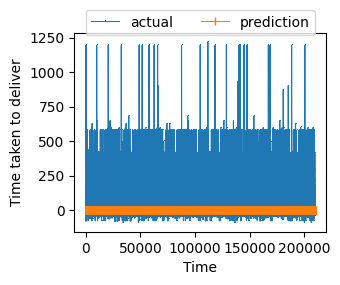

<Figure size 640x480 with 0 Axes>

In [85]:
plt.figure(figsize=(3.48761,3))
plt.plot(y_test_bil.flatten(), marker=',',label='true',linewidth=0.8)
plt.plot(y_pred_lsauto.flatten(), marker='|',label='Predicted',linewidth=0.8)
plt.xlabel('Time')
plt.ylabel('Time taken to deliver')

plt.legend(['actual', 'prediction'], loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2)
plt.tight_layout()
plt.show()
plt.savefig('fig5.pgf')

In [86]:
df22 = pd.read_excel(r"~/Downloads/BID_RA_data/BID_RA_21_22.xlsx")

In [88]:
df22_1 = df22.drop(df22.columns[[0, 7, 8, 14, 19, 20, 21, 31 ]], axis=1)
df22_1["price"] = df22_1["Order value"]/df22_1["Order Qty"]
df22_1["Time taken to deliver"] = (df22_1["Expected delivery date"] - df22_1["Order Date"]).dt.days
df22_1.drop(columns=["Month_Name_OrderDate", "Order_Quarter", "Invoice Date","CRAC date", "Payment Date"], inplace=True)
for column in columns_to_encode:
       df22_1[column+'_encoded'] = le.fit_transform(df22_1[column])
df22_1 = df22_1.drop(columns=["FY_OrderDate", "Bid start date", "Bid end date"])
df22_1["Payment Type"+'_encoded'] = le.fit_transform(df22_1["Payment Type"])
df22_1["MSME verified social category"+'_encoded'] = le.fit_transform(df22_1["MSME verified social category"])
df22_1 = df22_1.drop(columns=["MSME verified social category", "Payment Type"])
df22_1 = df22_1.drop(columns=["Order Date", "Expected delivery date", "Shipment received date"])
df22_1 = df22_1.drop(columns=["Purchase Mode", "Order MSME Verified", "MSME verfied gender wise", "Startup verfied"])
I = df22_1.drop(columns=['Time taken to deliver'])
j = df22_1['Time taken to deliver']
I_train, I_test, j_train, j_test = train_test_split(I, j, test_size=0.2)
I_train_bil, j_train_bil = np.array(I_train), np.array(j_train)
I_test_bil, j_test_bil = np.array(I_test), np.array(j_test)
#X_train_bil = X_train_bil.reshape((X_train_bil.shape[0], 1, X_train_bil.shape[1]))
#X_test_bil = X_test_bil.reshape((X_test_bil.shape[0], 1, X_test_bil.shape[1]))
print(I_train_bil.shape, j_train_bil.shape, I_test_bil.shape, j_test_bil.shape)

(838852, 14) (838852,) (209713, 14) (209713,)


In [89]:
# Make predictions
j_pred_lsauto = model_lsauto.predict(I_test_bil)


6554/6554 [==============================] - 54s 8ms/step


In [90]:
mse_lsauto_uns = mean_squared_error(j_test, j_pred_lsauto)
rmse_lsauto_uns = np.sqrt(mse_lsauto_uns)
print(f"Root Mean Squared Error: {rmse_lsauto_uns}")
print(f"Mean Squared Error: {mse_lsauto_uns}")

Root Mean Squared Error: 328.82127160094154
Mean Squared Error: 108123.42865726016


In [91]:
# Create a DataFrame of Real and Predicted values
prices_lsauto_unseen = pd.DataFrame({
    "Real": j_test.ravel(),
    "Predicted": j_pred_lsauto.ravel()
}, index = df1.index[-len(y_test): ]) 
prices_lsauto_unseen.head()

,Real,Predicted
838852,519,0.0
838853,292,0.0
838854,562,0.0
838855,45,0.0
838856,83,0.0


In [47]:
from keras.layers import Dense, Dropout, Activation, LSTM, Convolution1D, MaxPooling1D, Flatten

In [128]:
X_train.shape

(838852, 14)

## LSTM conv1d

In [143]:
model_lscon = Sequential()
model_lscon.add(Convolution1D(64, 3, input_shape=(1,14,1)))
model_lscon.add(MaxPooling1D(pool_size=2))
model_lscon.add(LSTM(100, return_sequences=True))
model_lscon.add(Dropout(0.2))
model_lscon.add(Convolution1D(32, 3))
model_lscon.add(MaxPooling1D(pool_size=2))
model_lscon.add(Flatten())
model_lscon.add(Dense(units=1))
model_lscon.add(Activation('linear'))

model_lscon.summary()

ValueError: Input 0 of layer "max_pooling1d_16" is incompatible with the layer: expected ndim=3, found ndim=4. Full shape received: (None, 1, 12, 64)

In [134]:
model_lscon.compile(loss='mse', optimizer='rmsprop', metrics=['accuracy'])

In [136]:
model_lscon.fit(X_train, y_train, batch_size=256, epochs=75, validation_data = (X_test, y_test), verbose=2)

Epoch 1/75


ValueError: in user code:

    File "/home/amit/railway/nature/lib/python3.8/site-packages/keras/src/engine/training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "/home/amit/railway/nature/lib/python3.8/site-packages/keras/src/engine/training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/amit/railway/nature/lib/python3.8/site-packages/keras/src/engine/training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "/home/amit/railway/nature/lib/python3.8/site-packages/keras/src/engine/training.py", line 1080, in train_step
        y_pred = self(x, training=True)
    File "/home/amit/railway/nature/lib/python3.8/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/amit/railway/nature/lib/python3.8/site-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_16" is incompatible with the layer: expected shape=(None, 838852, 14), found shape=(None, 14)


In [155]:
X_train.shape

(838852, 14)

In [158]:
# Create Conv1D model
Conv1Dmodel = keras.models.Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=X_train.shape),
    MaxPooling1D(pool_size=2),
    Flatten(),
    keras.layers.Dropout(0.2),  # Add dropout regularization
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.2),  # Add dropout regularization
    keras.layers.Dense(1, activation=None)
])
Conv1Dmodel.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_33 (Conv1D)          (None, 838850, 32)        1376      
                                                                 
 max_pooling1d_24 (MaxPooli  (None, 419425, 32)        0         
 ng1D)                                                           
                                                                 
 flatten_11 (Flatten)        (None, 13421600)          0         
                                                                 
 dropout_24 (Dropout)        (None, 13421600)          0         
                                                                 
 dense_23 (Dense)            (None, 32)                429491232 
                                                                 
 dropout_25 (Dropout)        (None, 32)                0         
                                                     

In [150]:
# Compile the model with Mean Squared Error loss and Nadam optimizer
Conv1Dmodel.compile(
    loss="mean_squared_error", 
    optimizer=tf.keras.optimizers.Nadam(learning_rate=0.001), 
    metrics=[tf.keras.metrics.MeanSquaredError(), tf.keras.metrics.RootMeanSquaredError()]
)

In [152]:
early_stop = EarlyStopping(monitor='val_root_mean_squared_error', min_delta=0.0, patience=10, verbose=1, mode='min')

history = Conv1Dmodel.fit(
    X_train, 
    y_train, 
    epochs=600,
    validation_data=(X_test, y_test), 
    callbacks=[early_stop]
)


Epoch 1/600


ValueError: in user code:

    File "/home/amit/railway/nature/lib/python3.8/site-packages/keras/src/engine/training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "/home/amit/railway/nature/lib/python3.8/site-packages/keras/src/engine/training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/amit/railway/nature/lib/python3.8/site-packages/keras/src/engine/training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "/home/amit/railway/nature/lib/python3.8/site-packages/keras/src/engine/training.py", line 1080, in train_step
        y_pred = self(x, training=True)
    File "/home/amit/railway/nature/lib/python3.8/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/amit/railway/nature/lib/python3.8/site-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_28" is incompatible with the layer: expected shape=(None, 838852, 14), found shape=(None, 14)


In [47]:
X_train.dtypes

Order Qty                                  int64
Order value                              float64
Shipment Quantity Received               float64
Shipment Quantity Rejected               float64
Shipment Quantity Accepted               float64
CRAC amount                              float64
Total payments                             int64
price                                    float64
Purchase Mode_encoded                      int64
MSME verfied gender wise_encoded           int64
Order MSME Verified_encoded                int64
Startup verfied_encoded                    int64
Payment Type_encoded                       int64
MSME verified social category_encoded      int64
dtype: object

In [77]:
X_train_bil, y_train_bil = np.array(X_train), np.array(y_train)
X_test_bil, y_test_bil = np.array(X_test), np.array(y_test)
#X_train_bil = X_train_bil.reshape((X_train_bil.shape[0], 1, X_train_bil.shape[1]))
#X_test_bil = X_test_bil.reshape((X_test_bil.shape[0], 1, X_test_bil.shape[1]))
print(X_train_bil.shape, y_train_bil.shape, X_test_bil.shape, y_test_bil.shape)

(838852, 14) (838852,) (209713, 14) (209713,)


In [122]:
X_train_bil.shape[2]

14

In [123]:
X_train_bil.shape[1]

1

In [124]:
X_train_bil.shape[0]

838852

In [115]:
# The LSTM architecture
regressorBilstm = Sequential()
# First LSTM layer with Dropout regularisation
regressorBilstm.add(LSTM( units=50, dropout = 0.10, return_sequences=True, input_shape = (X_train_bil.shape[0], X_train_bil.shape[1])))
regressorBilstm.add(Dropout(0.2))
# Second LSTM layer
regressorBilstm.add(LSTM(units=50, dropout = 0.10, return_sequences=True))
regressorBilstm.add(Dropout(0.2))
# Third LSTM layer
regressorBilstm.add(LSTM(units=50, dropout = 0.10, return_sequences=True))
regressorBilstm.add(Dropout(0.2))
# Fourth LSTM layer
regressorBilstm.add(LSTM( units=50, dropout = 0.10))
regressorBilstm.add(Dropout(0.2))
# The output layer
regressorBilstm.add(Dense(units=1))

# Compiling the LSTM
regressorBilstm.compile(optimizer='adam',loss='mean_squared_error')


In [116]:
# Fitting to the training set
regressorBilstm.summary()
history_bil=regressorBilstm.fit(X_train_bil,y_train_bil,validation_data=(X_test_bil, y_test_bil),epochs=50,shuffle=False)

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_64 (LSTM)              (None, 838852, 50)        13000     
                                                                 
 dropout_64 (Dropout)        (None, 838852, 50)        0         
                                                                 
 lstm_65 (LSTM)              (None, 838852, 50)        20200     
                                                                 
 dropout_65 (Dropout)        (None, 838852, 50)        0         
                                                                 
 lstm_66 (LSTM)              (None, 838852, 50)        20200     
                                                                 
 dropout_66 (Dropout)        (None, 838852, 50)        0         
                                                                 
 lstm_67 (LSTM)              (None, 50)              

ValueError: in user code:

    File "/home/amit/railway/nature/lib/python3.8/site-packages/keras/src/engine/training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "/home/amit/railway/nature/lib/python3.8/site-packages/keras/src/engine/training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/amit/railway/nature/lib/python3.8/site-packages/keras/src/engine/training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "/home/amit/railway/nature/lib/python3.8/site-packages/keras/src/engine/training.py", line 1080, in train_step
        y_pred = self(x, training=True)
    File "/home/amit/railway/nature/lib/python3.8/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/amit/railway/nature/lib/python3.8/site-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_16" is incompatible with the layer: expected shape=(None, 838852, 14), found shape=(None, 14)


In [55]:
y_test_bil

array([180,  90,  60, ...,  90,   7,  90])

## LSTM Architecture

In [79]:
# The LSTM architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(activation = "sigmoid", units=50, dropout = 0.10, return_sequences=True, input_shape = (X_train_bil.shape[1], X_train_bil.shape[2])))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=50, dropout = 0.10, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(activation = "sigmoid", units=50, dropout = 0.10, return_sequences=True))
regressor.add(Dropout(0.2))
# Fourth LSTM layer
regressor.add(LSTM(activation = "tanh", units=50, dropout = 0.10))
regressor.add(Dropout(0.2))
# The output layer
regressor.add(Dense(units=1))

# Compiling the LSTM
regressor.compile(optimizer='adam',loss='mean_squared_error')


In [80]:
# Fitting to the training set
regressor.summary()
history_lstmn=regressor.fit(X_train_bil,y_train_bil, epochs=10, batch_size=5, shuffle=False)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_44 (LSTM)              (None, 1, 50)             13000     
                                                                 
 dropout_44 (Dropout)        (None, 1, 50)             0         
                                                                 
 lstm_45 (LSTM)              (None, 1, 50)             20200     
                                                                 
 dropout_45 (Dropout)        (None, 1, 50)             0         
                                                                 
 lstm_46 (LSTM)              (None, 1, 50)             20200     
                                                                 
 dropout_46 (Dropout)        (None, 1, 50)             0         
                                                                 
 lstm_47 (LSTM)              (None, 50)              

KeyboardInterrupt: 

In [109]:
X_train.shape[1]
X_train.shape[0]

838852

In [56]:
from keras.layers import Dense, Embedding, GRU, LSTM, SpatialDropout1D,SimpleRNN,  Flatten, Bidirectional,  Dropout, Embedding

In [132]:
n_steps = X_train_bil.shape[0]
n_features = X_train_bil.shape[2]

# define model
model = Sequential()
model.add(SimpleRNN(60, input_shape=(n_steps,n_features), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['acc'])


es = EarlyStopping(monitor='val_acc', mode='max', 
                   patience=10, 
                   verbose=1,
                   restore_best_weights=True)

# fit model (uses early stopping)
model.fit(X_train_bil, y_train_bil, 
          epochs=300, 
          batch_size=70, 
          validation_split=0.2, # val is a random 20% of the data since shuffle = True
          verbose=1,
          callbacks=[es],
          shuffle=True)

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_7 (SimpleRNN)    (None, 60)                4500      
                                                                 
 dense_24 (Dense)            (None, 1)                 61        
                                                                 
Total params: 4561 (17.82 KB)
Trainable params: 4561 (17.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/300
9587/9587 [==============================] - 12s 1ms/step - loss: nan - acc: 0.0020 - val_loss: nan - val_acc: 0.0034
Epoch 2/300
9587/9587 [==============================] - 12s 1ms/step - loss: nan - acc: 0.0033 - val_loss: nan - val_acc: 0.0034
Epoch 3/300
9587/9587 [==============================] - 12s 1ms/step - loss: nan - acc: 0.0033 - val_loss: nan - val_acc: 0.0034
Epoch 4/300
9587/9587 [==

In [138]:
X_train_bil.shape[1]

1

In [136]:
# make a prediction
pred_rnn = model.predict(X_test_bil)# the pred
print(pred_rnn) # round them!


6554/6554 [==============================] - 4s 642us/step
[[nan]
 [nan]
 [nan]
 ...
 [nan]
 [nan]
 [nan]]


In [47]:
#reshape data
X_train_bilnw = np.reshape(X_train_bil, (X_train.shape[0], X_train.shape[1],1))

In [49]:
X_train_bilnw

array([[[1.00000000e+04],
        [2.95000000e+06],
        [3.45000000e+02],
        ...,
        [0.00000000e+00],
        [1.00000000e+00],
        [0.00000000e+00]],

       [[2.26239895e+08],
        [4.36642997e+08],
        [1.88190000e+05],
        ...,
        [0.00000000e+00],
        [3.00000000e+00],
        [0.00000000e+00]],

       [[4.13868000e+05],
        [5.54790054e+07],
        [1.45600000e+04],
        ...,
        [0.00000000e+00],
        [2.00000000e+00],
        [0.00000000e+00]],

       ...,

       [[8.00000000e+02],
        [1.32640000e+09],
        [1.00000000e+00],
        ...,
        [0.00000000e+00],
        [1.00000000e+00],
        [0.00000000e+00]],

       [[6.08200000e+03],
        [1.03333180e+07],
        [1.40000000e+02],
        ...,
        [0.00000000e+00],
        [1.00000000e+00],
        [0.00000000e+00]],

       [[2.26239895e+08],
        [4.36642997e+08],
        [2.50992000e+05],
        ...,
        [0.00000000e+00],
        [3.0000

In [50]:
X_train_bil

array([[1.00000000e+04, 2.95000000e+06, 3.45000000e+02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [2.26239895e+08, 4.36642997e+08, 1.88190000e+05, ...,
        0.00000000e+00, 3.00000000e+00, 0.00000000e+00],
       [4.13868000e+05, 5.54790054e+07, 1.45600000e+04, ...,
        0.00000000e+00, 2.00000000e+00, 0.00000000e+00],
       ...,
       [8.00000000e+02, 1.32640000e+09, 1.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [6.08200000e+03, 1.03333180e+07, 1.40000000e+02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [2.26239895e+08, 4.36642997e+08, 2.50992000e+05, ...,
        0.00000000e+00, 3.00000000e+00, 0.00000000e+00]])

In [45]:
X_train_bil.shape[1]

14

In [162]:
#LSTM architecture

# The LSTM architecture
regressor_new = Sequential()

# layer 1
regressor_new.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_bil.shape[1],1)))
regressor_new.add(Dropout(0.2))
# layer 2
regressor_new.add(LSTM(units=50, return_sequences=True))
regressor_new.add(Dropout(0.2))
# layer 3
regressor_new.add(LSTM(units=50, return_sequences=True))
regressor_new.add(Dropout(0.2))
# layer 4
regressor_new.add(LSTM(units=50))
regressor_new.add(Dropout(0.2))
# output
regressor_new.add(Dense(units=1))

# compile RNN, MSE loss, rmsprop optimizer
regressor_new.compile(optimizer='rmsprop',loss='mean_squared_error')


In [ ]:
# Fitting to the training set
regressor_new.fit(X_train_bil,y_train_bil,epochs=20,batch_size=50)

Epoch 1/20
16778/16778 [==============================] - 312s 18ms/step - loss: nan
Epoch 2/20
16778/16778 [==============================] - 290s 17ms/step - loss: nan
Epoch 3/20
16778/16778 [==============================] - 283s 17ms/step - loss: nan
Epoch 4/20
16778/16778 [==============================] - 289s 17ms/step - loss: nan
Epoch 5/20
16778/16778 [==============================] - 289s 17ms/step - loss: nan
Epoch 6/20
16778/16778 [==============================] - 278s 17ms/step - loss: nan
Epoch 7/20
16778/16778 [==============================] - 268s 16ms/step - loss: nan
Epoch 8/20
16778/16778 [==============================] - 277s 17ms/step - loss: nan
Epoch 9/20
 8317/16778 [=============>................] - ETA: 2:24 - loss: nan

In [151]:
X_train_bil

array([[1.38663161e+08, 2.67619901e+08, 1.59534000e+05, ...,
        0.00000000e+00, 3.00000000e+00, 0.00000000e+00],
       [2.00000000e+05, 8.83600000e+06, 5.76880000e+04, ...,
        0.00000000e+00, 2.00000000e+00, 0.00000000e+00],
       [1.38663161e+08, 2.67619901e+08, 2.02392000e+05, ...,
        0.00000000e+00, 3.00000000e+00, 0.00000000e+00],
       ...,
       [1.38663161e+08, 2.67619901e+08, 3.60180000e+05, ...,
        0.00000000e+00, 3.00000000e+00, 0.00000000e+00],
       [2.26239895e+08, 4.36642997e+08, 0.00000000e+00, ...,
        0.00000000e+00, 3.00000000e+00, 0.00000000e+00],
       [9.30000000e+01, 2.88300000e+06, 1.00000000e+00, ...,
        0.00000000e+00, 2.00000000e+00, 0.00000000e+00]])

In [53]:
X_train_bil

array([[1.00000000e+04, 2.95000000e+06, 3.45000000e+02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [2.26239895e+08, 4.36642997e+08, 1.88190000e+05, ...,
        0.00000000e+00, 3.00000000e+00, 0.00000000e+00],
       [4.13868000e+05, 5.54790054e+07, 1.45600000e+04, ...,
        0.00000000e+00, 2.00000000e+00, 0.00000000e+00],
       ...,
       [8.00000000e+02, 1.32640000e+09, 1.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [6.08200000e+03, 1.03333180e+07, 1.40000000e+02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [2.26239895e+08, 4.36642997e+08, 2.50992000e+05, ...,
        0.00000000e+00, 3.00000000e+00, 0.00000000e+00]])

In [ ]:
## NEW

In [54]:
X_train_bw = X_train_bil.reshape((X_train_bil.shape[0], X_train_bil.shape[1], 1))
X_test_bw = X_test_bil.reshape((X_test_bil.shape[0], X_test_bil.shape[1], 1))

In [55]:
X_train_bw

array([[[1.00000000e+04],
        [2.95000000e+06],
        [3.45000000e+02],
        ...,
        [0.00000000e+00],
        [1.00000000e+00],
        [0.00000000e+00]],

       [[2.26239895e+08],
        [4.36642997e+08],
        [1.88190000e+05],
        ...,
        [0.00000000e+00],
        [3.00000000e+00],
        [0.00000000e+00]],

       [[4.13868000e+05],
        [5.54790054e+07],
        [1.45600000e+04],
        ...,
        [0.00000000e+00],
        [2.00000000e+00],
        [0.00000000e+00]],

       ...,

       [[8.00000000e+02],
        [1.32640000e+09],
        [1.00000000e+00],
        ...,
        [0.00000000e+00],
        [1.00000000e+00],
        [0.00000000e+00]],

       [[6.08200000e+03],
        [1.03333180e+07],
        [1.40000000e+02],
        ...,
        [0.00000000e+00],
        [1.00000000e+00],
        [0.00000000e+00]],

       [[2.26239895e+08],
        [4.36642997e+08],
        [2.50992000e+05],
        ...,
        [0.00000000e+00],
        [3.0000

In [81]:

## Build new LSTM Model


model_lsprice = Sequential()

number_units = 5
dropout_fraction = 0.2

# Layer 1
model_lsprice.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train_bw.shape[1], 1))
    )
model_lsprice.add(Dropout(dropout_fraction))
# Layer 2
model_lsprice.add(LSTM(units=number_units, return_sequences=True))
model_lsprice.add(Dropout(dropout_fraction))
# Layer 3
model_lsprice.add(LSTM(units=number_units))
model_lsprice.add(Dropout(dropout_fraction))
# Output layer
model_lsprice.add(Dense(1))

In [62]:
X_train_bw.shape

(838852, 14, 1)

In [65]:
X_train_bw.shape[2]

1

In [82]:
# Compile the model
model_lsprice.compile(optimizer="adam", loss="mean_squared_error")

In [83]:
# Summarize the model
model_lsprice.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, 14, 5)             140       
                                                                 
 dropout_15 (Dropout)        (None, 14, 5)             0         
                                                                 
 lstm_16 (LSTM)              (None, 14, 5)             220       
                                                                 
 dropout_16 (Dropout)        (None, 14, 5)             0         
                                                                 
 lstm_17 (LSTM)              (None, 5)                 220       
                                                                 
 dropout_17 (Dropout)        (None, 5)                 0         
                                                                 
 dense_5 (Dense)             (None, 1)                

In [101]:
model_lsprice.fit(X_train_bw, y_train, epochs=10, shuffle=False, batch_size=30, validation_split=0.2, verbose=1)

Epoch 1/10
22370/22370 [==============================] - 289s 13ms/step - loss: nan - val_loss: nan
Epoch 2/10
22370/22370 [==============================] - 282s 13ms/step - loss: nan - val_loss: nan
Epoch 3/10
22370/22370 [==============================] - 289s 13ms/step - loss: nan - val_loss: nan
Epoch 4/10
22370/22370 [==============================] - 299s 13ms/step - loss: nan - val_loss: nan
Epoch 5/10
22370/22370 [==============================] - 306s 14ms/step - loss: nan - val_loss: nan
Epoch 6/10
22370/22370 [==============================] - 344s 15ms/step - loss: nan - val_loss: nan
Epoch 7/10
22370/22370 [==============================] - 329s 15ms/step - loss: nan - val_loss: nan
Epoch 8/10
22370/22370 [==============================] - 312s 14ms/step - loss: nan - val_loss: nan
Epoch 9/10
22370/22370 [==============================] - 311s 14ms/step - loss: nan - val_loss: nan
Epoch 10/10
22370/22370 [==============================] - 329s 15ms/step - loss: nan - val

In [72]:
y_train

337321      10
704898      90
349443     180
144020      17
62192       60
          ... 
820640      60
504346      90
924242     180
1041424    180
706503      90
Name: Time taken to deliver, Length: 838852, dtype: int64

In [103]:
lsp_pred = model_lsprice.predict(X_test_bw)

6554/6554 [==============================] - 16s 2ms/step


In [104]:
lsp_pred

array([[nan],
       [nan],
       [nan],
       ...,
       [nan],
       [nan],
       [nan]], dtype=float32)

In [ ]:
## XGBOOST

In [88]:
import xgboost as xgb

In [90]:
# Create an XGBoost DMatrix for training and testing
dtrain = xgb.DMatrix(X_train_bil, label=y_train_bil)
dtest = xgb.DMatrix(X_test_bil, label=y_test_bil)


In [92]:
# Set hyperparameters
params = {
    'max_depth': 3,
    'eta': 0.1,
    'objective': 'reg:squarederror',  # for regression tasks
    'eval_metric': 'rmse'  # root mean squared error for regression
}


In [93]:
# Train the XGBoost model
num_rounds = 100
model_xgbt = xgb.train(params, dtrain, num_rounds)

In [94]:
y_pred_xgbt = model_xgbt.predict(dtest)

In [95]:
y_pred_xgbt

array([92.46563 , 86.34876 , 90.16688 , ..., 13.814928, 88.76918 ,
       90.14639 ], dtype=float32)

In [97]:
# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred_xgbt)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 38.763815013177705


In [100]:
# Create a DataFrame of Real and Predicted values
prices_xgb = pd.DataFrame({
    "Real": y_test.ravel(),
    "Predicted": y_pred_xgbt.ravel()
}, index = df1.index[-len(y_test): ]) 
prices_xgb.head()

,Real,Predicted
838852,90,92.465630
838853,60,86.348763
838854,90,90.166878
838855,20,33.023415
838856,28,65.440323


In [105]:
## Uncertainty Estimation with Probabilistic and Bayesian neural network

array([[[1.00000000e+04],
        [2.95000000e+06],
        [3.45000000e+02],
        ...,
        [0.00000000e+00],
        [1.00000000e+00],
        [0.00000000e+00]],

       [[2.26239895e+08],
        [4.36642997e+08],
        [1.88190000e+05],
        ...,
        [0.00000000e+00],
        [3.00000000e+00],
        [0.00000000e+00]],

       [[4.13868000e+05],
        [5.54790054e+07],
        [1.45600000e+04],
        ...,
        [0.00000000e+00],
        [2.00000000e+00],
        [0.00000000e+00]],

       ...,

       [[8.00000000e+02],
        [1.32640000e+09],
        [1.00000000e+00],
        ...,
        [0.00000000e+00],
        [1.00000000e+00],
        [0.00000000e+00]],

       [[6.08200000e+03],
        [1.03333180e+07],
        [1.40000000e+02],
        ...,
        [0.00000000e+00],
        [1.00000000e+00],
        [0.00000000e+00]],

       [[2.26239895e+08],
        [4.36642997e+08],
        [2.50992000e+05],
        ...,
        [0.00000000e+00],
        [3.0000

In [52]:
### REFINED LSTM Model

In [53]:
LSTMModel = tf.keras.Sequential([
    LSTM(100, return_sequences=True, input_shape = (X_train_bil.shape[1], 1)),
    Dropout(0.3),
    LSTM(100, return_sequences=False), 
    Dropout(0.3),
    # tfp.layers.DenseVariational(
    # 50,
    # make_posterior_fn = posterior_fn,
    # make_prior_fn = prior_fn),
    Dense(1)
])
LSTMModel.compile(optimizer = 'adam', loss = 'mean_squared_error')
LSTMModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 14, 100)           40800     
                                                                 
 dropout (Dropout)           (None, 14, 100)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 121301 (473.83 KB)
Trainable params: 121301 (473.83 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [67]:
history_lst = LSTMModel.fit(
    X_train_bil,
    y_train_bil, epochs = 50,
    batch_size = 32, 
    verbose = 1
)

Epoch 1/50
12230/26215 [============>.................] - ETA: 2:45 - loss: nan

KeyboardInterrupt: 

In [58]:
X_train_bw.shape

(838852, 14, 1)

In [59]:
y_train_bil

array([90, 15, 90, ..., 17, 30, 30])

In [69]:
!pip install catboost

  Obtaining dependency information for catboost from https://files.pythonhosted.org/packages/77/c0/c601b9848353eec5e4eb3714a48c19e94749f0a518447cdda192eed663fc/catboost-1.2.2-cp38-cp38-manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 504.1 kB/s eta 0:00:0031m53.3 MB/s eta 0:00:01
  Obtaining dependency information for plotly from https://files.pythonhosted.org/packages/a8/07/72953cf70e3bd3a24cbc3e743e6f8539abe6e3e6d83c3c0c83426eaffd39/plotly-5.18.0-py3-none-any.whl.metadata
  Obtaining dependency information for tenacity>=6.2.0 from https://files.pythonhosted.org/packages/f4/f1/990741d5bb2487d529d20a433210ffa136a367751e454214013b441c4575/tenacity-8.2.3-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 16.9 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 12.5 MB/s eta 0:00:00m eta 0:00:010:01:01

[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] T

In [70]:
import catboost
from catboost import CatBoostRegressor

In [71]:
# Initialize CatBoostRegressor
catboost_model = CatBoostRegressor(iterations=1000,  # Adjust the number of iterations as needed
                                   learning_rate=0.1,  # Adjust the learning rate as needed
                                   depth=6,  # Adjust the depth of the trees
                                   loss_function='RMSE',  # Specify the loss function for regression
                                   random_seed=42,
                                   verbose=100)  # Set verbose to True for progress information


In [77]:
# Fit the model
catboost_model.fit(X_train_bil, y_train_bil, eval_set=(X_test_bil, y_test_bil), use_best_model=True)


0:	learn: 68.6214234	test: 69.0715591	best: 69.0715591 (0)	total: 136ms	remaining: 2m 15s
100:	learn: 29.1382083	test: 28.9905704	best: 28.9905704 (100)	total: 5.29s	remaining: 47.1s
200:	learn: 22.6252750	test: 22.1147196	best: 22.1147196 (200)	total: 9.95s	remaining: 39.5s
300:	learn: 19.9879936	test: 19.5475675	best: 19.5475675 (300)	total: 15.1s	remaining: 35s
400:	learn: 18.1048322	test: 17.7311283	best: 17.7311283 (400)	total: 19.6s	remaining: 29.3s
500:	learn: 16.8995794	test: 16.5875414	best: 16.5875414 (500)	total: 24.3s	remaining: 24.2s
600:	learn: 15.9764252	test: 15.7097636	best: 15.7097636 (600)	total: 29s	remaining: 19.3s
700:	learn: 15.2998866	test: 15.0954714	best: 15.0954714 (700)	total: 33.3s	remaining: 14.2s
800:	learn: 14.7591282	test: 14.6013453	best: 14.6013453 (800)	total: 38s	remaining: 9.45s
900:	learn: 14.2956678	test: 14.1616931	best: 14.1616931 (900)	total: 42.4s	remaining: 4.66s
999:	learn: 13.8885895	test: 13.7826605	best: 13.7826605 (999)	total: 46.7s	rem

In [78]:
# Make predictions
y_pred_catb = catboost_model.predict(X_test_bil)


In [79]:
y_pred_catb

array([ 26.1742342 , 179.66737394,  60.18423768, ..., 370.07063371,
        90.16239215, 180.40368132])

In [82]:
mse_cat = mean_squared_error(y_test, y_pred_catb)
rmse_cat = np.sqrt(mse_cat)
print(f"Root Mean Squared Error: {rmse_cat}")
print(f"Mean Squared Error: {mse_cat}")

Root Mean Squared Error: 13.782660510799502
Mean Squared Error: 189.961730755952


In [83]:
# Create a DataFrame of Real and Predicted values
prices_catb = pd.DataFrame({
    "Real": y_test.ravel(),
    "Predicted": y_pred_catb.ravel()
}, index = df1.index[-len(y_test): ]) 
prices_catb.head()

,Real,Predicted
838852,23,26.174234
838853,180,179.667374
838854,60,60.184238
838855,222,221.455454
838856,60,58.578243


In [ ]:
## ON Unseen Data

In [87]:
prices_catb

,Real,Predicted
838852,23,26.174234
838853,180,179.667374
838854,60,60.184238
838855,222,221.455454
838856,60,58.578243
...,...,...
1048560,90,90.116419
1048561,60,18.805456
1048562,365,370.070634
1048563,90,90.162392


In [ ]:
df22 = pd.read_excel(r"~/Downloads/BID_RA_data/BID_RA_21_22.xlsx")
df22_1 = df22.drop(df22.columns[[0, 7, 8, 14, 19, 20, 21, 31 ]], axis=1)
df22_1["price"] = df22_1["Order value"]/df22_1["Order Qty"]
df22_1["Time taken to deliver"] = (df22_1["Expected delivery date"] - df22_1["Order Date"]).dt.days
df22_1.drop(columns=["Month_Name_OrderDate", "Order_Quarter", "Invoice Date","CRAC date", "Payment Date"], inplace=True)
for column in columns_to_encode:
       df22_1[column+'_encoded'] = le.fit_transform(df22_1[column])
df22_1 = df22_1.drop(columns=["FY_OrderDate", "Bid start date", "Bid end date"])
df22_1["Payment Type"+'_encoded'] = le.fit_transform(df22_1["Payment Type"])
df22_1["MSME verified social category"+'_encoded'] = le.fit_transform(df22_1["MSME verified social category"])
df22_1 = df22_1.drop(columns=["MSME verified social category", "Payment Type"])
df22_1 = df22_1.drop(columns=["Order Date", "Expected delivery date", "Shipment received date"])
df22_1 = df22_1.drop(columns=["Purchase Mode", "Order MSME Verified", "MSME verfied gender wise", "Startup verfied"])
I = df22_1.drop(columns=['Time taken to deliver'])
j = df22_1['Time taken to deliver']
I_train, I_test, j_train, j_test = train_test_split(I, j, test_size=0.2)
I_train_bil, j_train_bil = np.array(I_train), np.array(j_train)
I_test_bil, j_test_bil = np.array(I_test), np.array(j_test)
#X_train_bil = X_train_bil.reshape((X_train_bil.shape[0], 1, X_train_bil.shape[1]))
#X_test_bil = X_test_bil.reshape((X_test_bil.shape[0], 1, X_test_bil.shape[1]))
print(I_train_bil.shape, j_train_bil.shape, I_test_bil.shape, j_test_bil.shape)



In [122]:
df22 = pd.read_excel(r"~/Downloads/BID_RA_data/BID_RA_21_22.xlsx")

In [123]:
df22_1 = df22.drop(df22.columns[[0, 7, 8, 14, 19, 20, 21, 31 ]], axis=1)

In [124]:
df22_1["price"] = df22_1["Order value"]/df22_1["Order Qty"]

In [125]:
df22_1["Time taken to deliver"] = (df22_1["Expected delivery date"] - df22_1["Order Date"]).dt.days

In [126]:
df22_1.drop(columns=["Month_Name_OrderDate", "Order_Quarter", "Invoice Date","CRAC date", "Payment Date"], inplace=True)

In [127]:
for column in columns_to_encode:
       df22_1[column+'_encoded'] = le.fit_transform(df22_1[column])

In [128]:
df22_1 = df22_1.drop(columns=["FY_OrderDate", "Bid start date", "Bid end date"])

In [129]:
df22_1["Payment Type"+'_encoded'] = le.fit_transform(df22_1["Payment Type"])

In [130]:
df22_1["MSME verified social category"+'_encoded'] = le.fit_transform(df22_1["MSME verified social category"])

In [131]:
df22_1 = df22_1.drop(columns=["MSME verified social category", "Payment Type"])

In [132]:
df22_1 = df22_1.drop(columns=["Order Date", "Expected delivery date", "Shipment received date"])

In [133]:
df22_1 = df22_1.drop(columns=["Purchase Mode", "Order MSME Verified", "MSME verfied gender wise", "Startup verfied"])

In [134]:
I = df22_1.drop(columns=['Time taken to deliver'])
j = df22_1['Time taken to deliver']

In [135]:
I.shape

(1048565, 14)

In [136]:
I_train, I_test, j_train, j_test = train_test_split(I, j, test_size=0.2)

In [137]:
I_train_bil, j_train_bil = np.array(I_train), np.array(j_train)
I_test_bil, j_test_bil = np.array(I_test), np.array(j_test)
#X_train_bil = X_train_bil.reshape((X_train_bil.shape[0], 1, X_train_bil.shape[1]))
#X_test_bil = X_test_bil.reshape((X_test_bil.shape[0], 1, X_test_bil.shape[1]))
print(I_train_bil.shape, j_train_bil.shape, I_test_bil.shape, j_test_bil.shape)

(838852, 14) (838852,) (209713, 14) (209713,)


In [108]:
# Testing on unseen data

In [138]:
# Make predictions
j_pred_catb = catboost_model.predict(I_test_bil)

In [139]:
mse_cat_uns = mean_squared_error(j_test, j_pred_catb)
rmse_cat_uns = np.sqrt(mse_cat_uns)
print(f"Root Mean Squared Error: {rmse_cat_uns}")
print(f"Mean Squared Error: {mse_cat_uns}")

Root Mean Squared Error: 269.45634312571195
Mean Squared Error: 72606.7208506814


In [140]:
# Create a DataFrame of Real and Predicted values
prices_catb_unseen = pd.DataFrame({
    "Real": j_test.ravel(),
    "Predicted": j_pred_catb.ravel()
}, index = df1.index[-len(y_test): ]) 
prices_catb_unseen.head()

,Real,Predicted
838852,180,90.326261
838853,180,27.018569
838854,7,101.870700
838855,150,108.538470
838856,60,57.317024
